Enter the location of folderkuttarbaccha
Enter your search keyword: kutta
Enter the number of images you want: 10
Searching Images....
Found 10 images
Start downloading...
Download Completed!
Do you want to see the downloaded images?(y/n) y
Showing 10 images from /content/kuttarbaccha


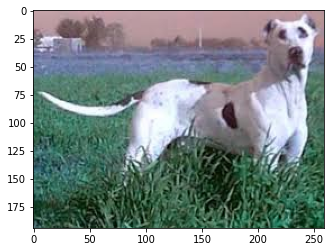

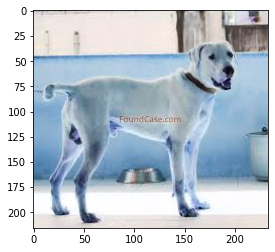

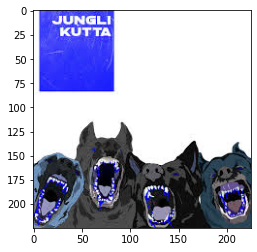

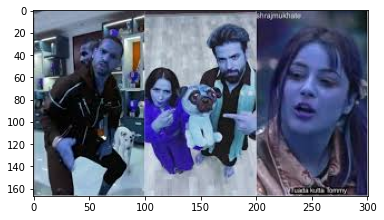

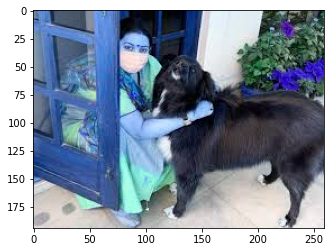

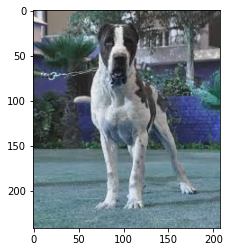

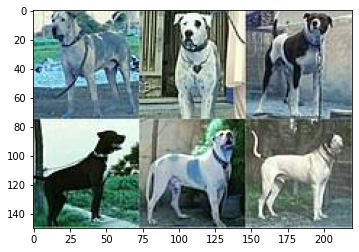

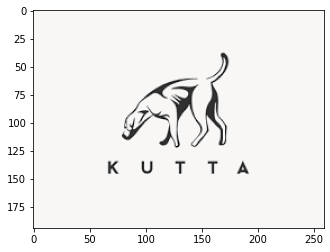

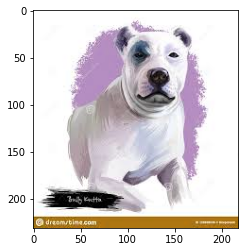

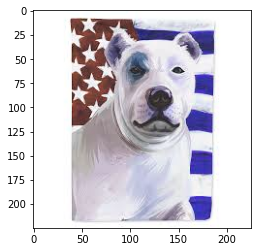

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

import requests # pip install requests #to sent GET requests
from bs4 import BeautifulSoup # pip install bs4 #to parse html(getting data out from html, xml or other markup languages)
Google_Image = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'
u_agnt = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
} #write: 'my user agent' in browser to get your browser user agent details

Image_Folder = 'Images_11'

def main():
    Image_folder = input('Enter the location of folder')
    if not os.path.exists(Image_folder):
        os.mkdir(Image_folder)
    download_images(Image_folder)
    show_images(Image_folder)

def download_images(image_folder):
    data = input('Enter your search keyword: ')
    num_images = int(input('Enter the number of images you want: '))
    
    print('Searching Images....')
    
    search_url = Google_Image + 'q=' + data #'q=' because its a query
    
    # request url, without u_agnt the permission gets denied
    response = requests.get(search_url, headers=u_agnt)
    html = response.text #To get actual result i.e. to read the html data in text mode
    
    # find all img where class='rg_i Q4LuWd'
    b_soup = BeautifulSoup(html, 'html.parser') #html.parser is used to parse/extract features from HTML files
    results = b_soup.findAll('img', {'class': 'rg_i Q4LuWd'})
    count = 0
    imagelinks= []
    for res in results:
        try:
            link = res['data-src']
            imagelinks.append(link)
            count = count + 1
            if (count >= num_images):
                break
            
        except KeyError:
            continue
    
    print(f'Found {len(imagelinks)} images')
    print('Start downloading...')
    for i, imagelink in enumerate(imagelinks):
        # open each image link and save the file
        response = requests.get(imagelink)
        
        imagename = image_folder + '/' + data + str(i+1) + '.jpg'
        with open(imagename, 'wb') as file:
            file.write(response.content)

    print('Download Completed!')
def show_images(image_folder):   
    show_image = input("Do you want to see the downloaded images?(y/n) ")
    if show_image =='y':
      dir = '/content/'+image_folder
      
      data_paths = [os.path.join(dir, f) for f in os.listdir(dir)]
      data_paths = [i for i in data_paths if os.path.isfile(i)]
      print('Showing',len(data_paths),'images from',dir)
      for path in data_paths:
        img = cv2.imread(path)
        plt.imshow(img)
        plt.show() 

if __name__ == '__main__':
    main()
